In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-sale-data/diamonds.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/diamonds-sale-data/diamonds.csv')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Rename the columns by assuming x as length y as width and z as depth
df = df.rename(columns={'x': 'x(length)', 'y': 'y(width)', 'z': 'z(height)'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x(length)  53940 non-null  float64
 8   y(width)   53940 non-null  float64
 9   z(height)  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x(length)    0
y(width)     0
z(height)    0
dtype: int64

In [8]:
df = df.drop_duplicates()

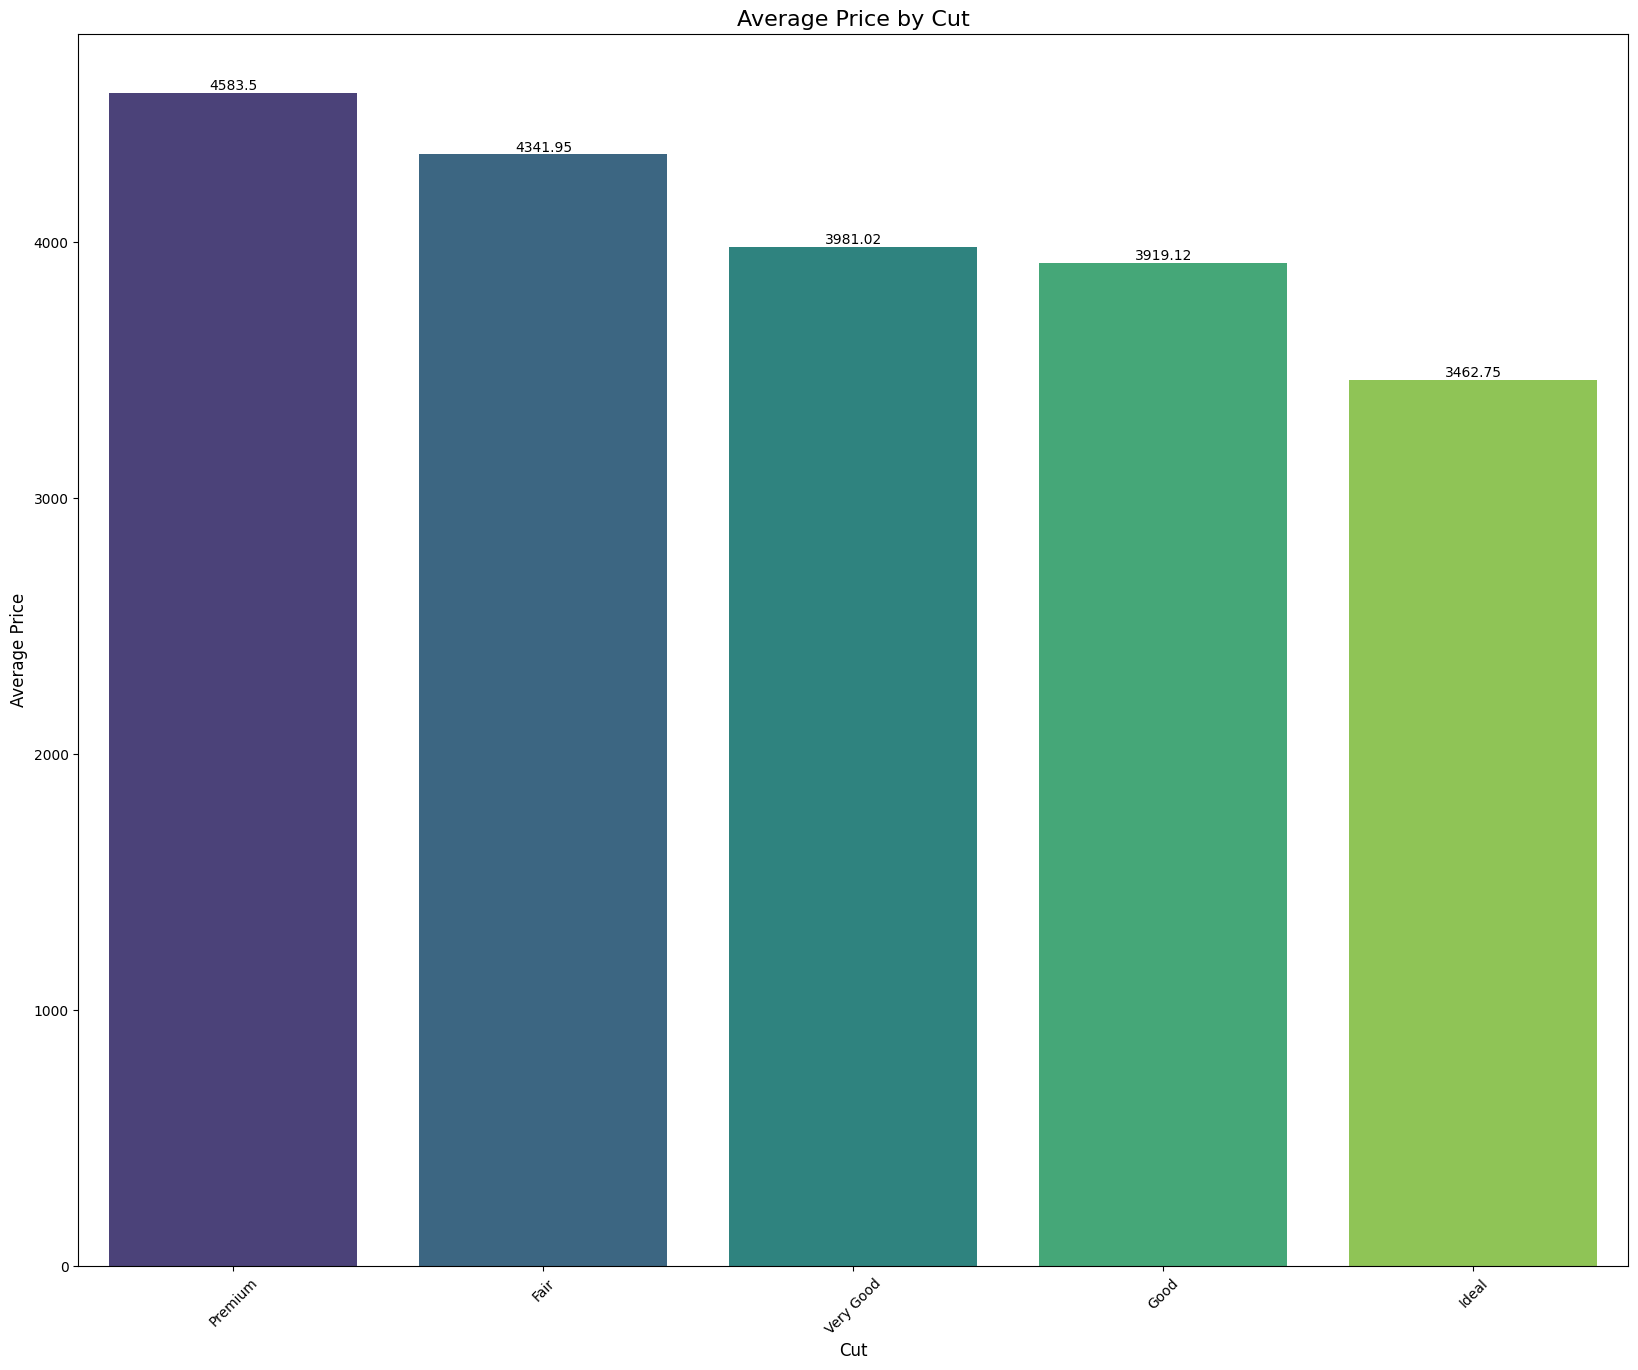

In [9]:
# Bar plot of average price by cut with values
plt.figure(figsize=(20, 16))
avg_price_by_cut = df.groupby('cut')['price'].mean().sort_values(ascending=False)
bar_plot = sns.barplot(x=avg_price_by_cut.index, y=avg_price_by_cut.values, palette='viridis')
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price by Cut', fontsize=16)
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bar_plot.containers:
    bar_plot.bar_label(bar, label_type='edge')

plt.show()

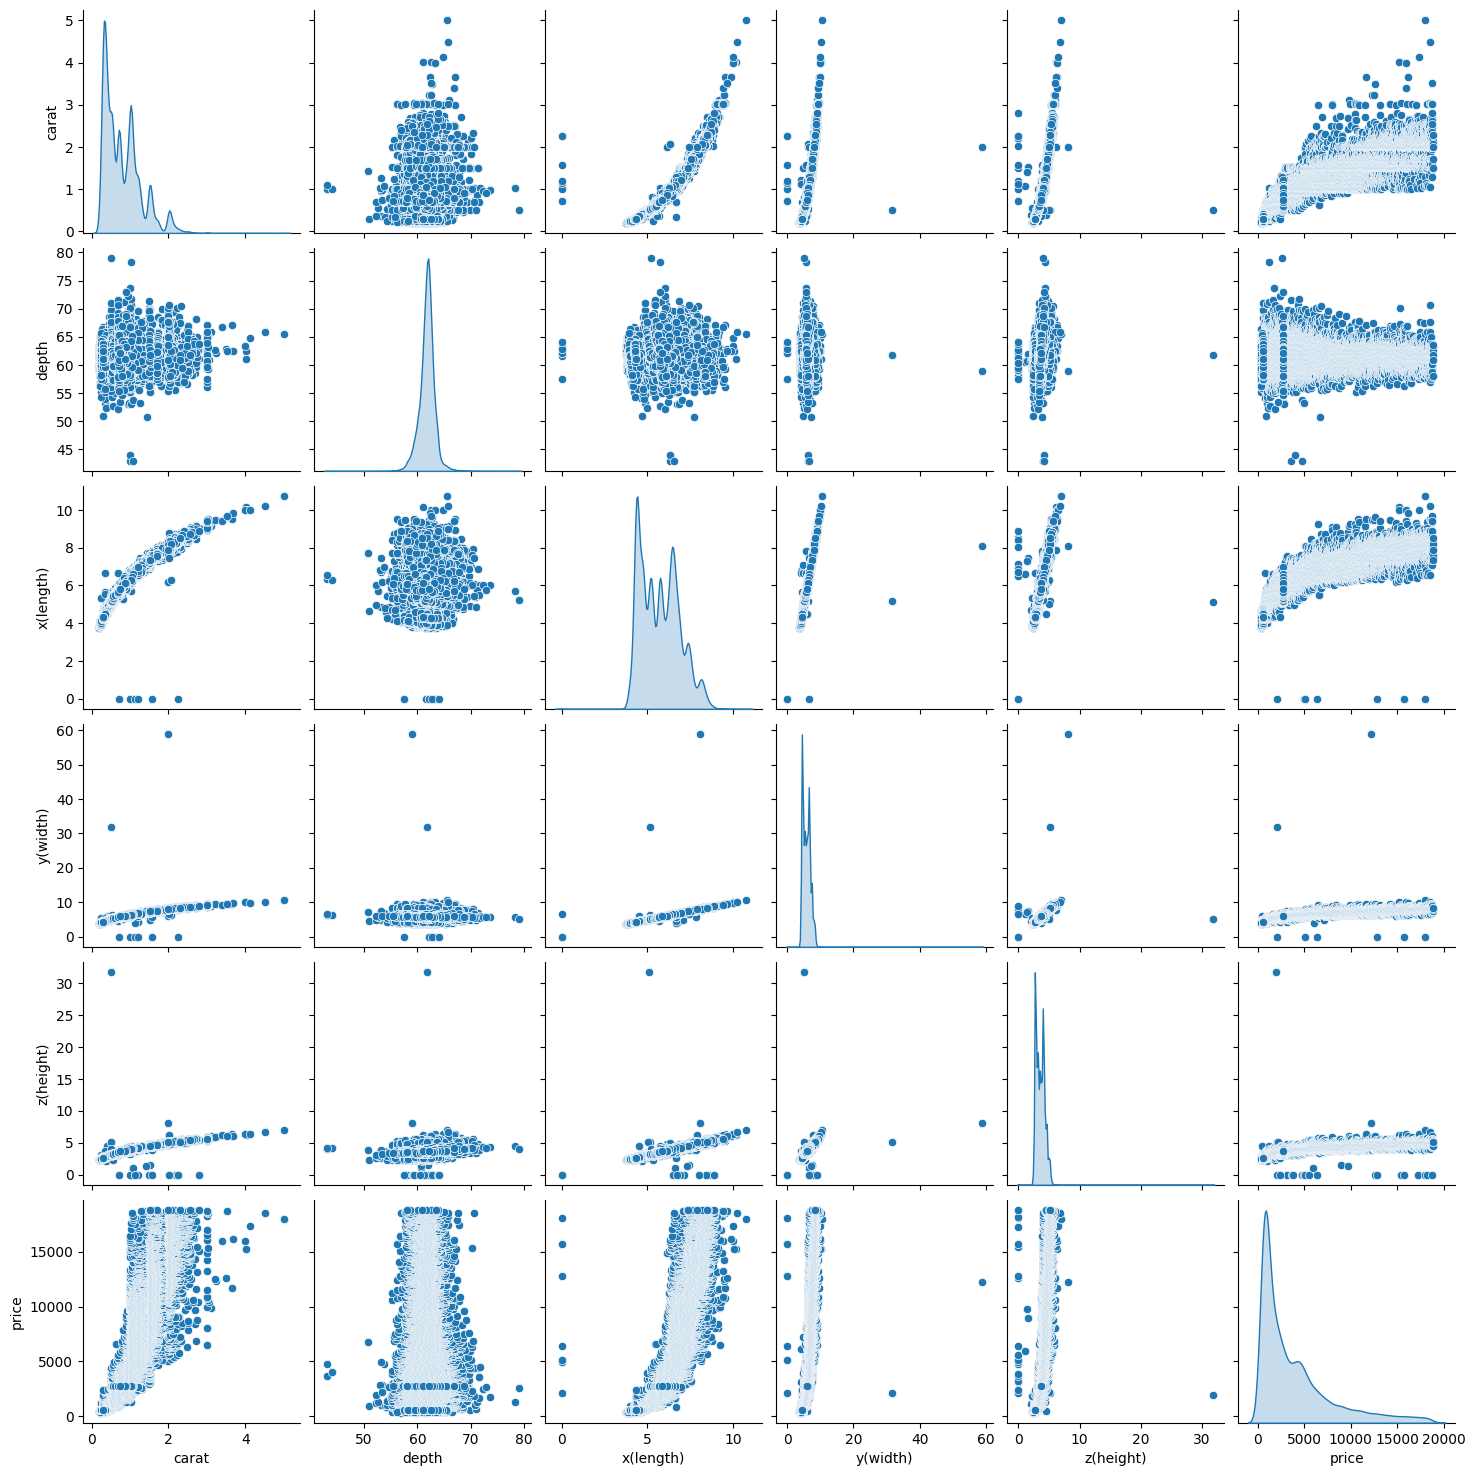

In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Pair plot
with pd.option_context('mode.use_inf_as_na', False):
    sns.pairplot(df[['carat', 'depth', 'x(length)', 'y(width)', 'z(height)', 'price']], diag_kind='kde')
plt.show()

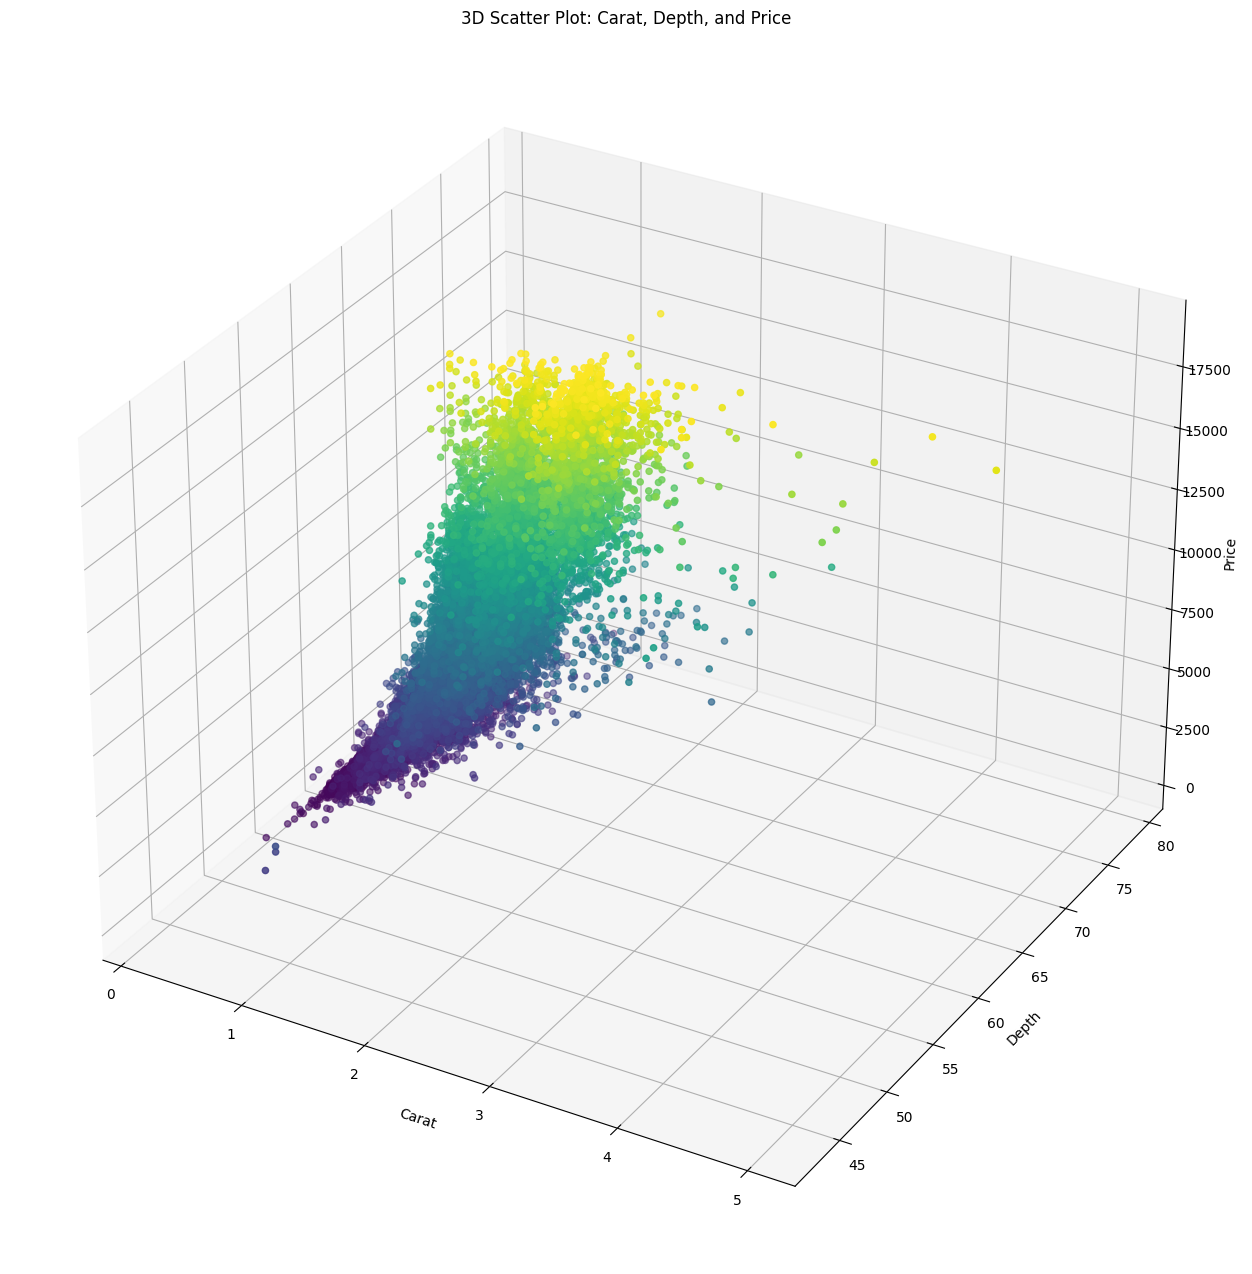

In [11]:
# 3D scatter plot of carat, depth, and price
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['depth'], df['price'], c=df['price'], cmap='viridis')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
plt.title('3D Scatter Plot: Carat, Depth, and Price')
plt.show()